In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/date_db.csv')

In [7]:
df= df.drop([0,1],axis=0)

In [11]:
df.sum()

Unnamed: 0        2020-03-012020-03-022020-03-032020-03-042020-0...
num_comments                                             13052505.0
num_comments.1                                           10578558.0
num_comments.2                                            1118446.0
dtype: object

In [12]:
df.rename(columns={'Unnamed: 0':'Date', 'num_comments': 'Anti_Vax', 'num_comments.1': 'Neutral', 'num_comments.2': 'Pro_vax'}, inplace=True)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['total'] = df['Anti_Vax'] + df['Neutral'] + df['Pro_vax']

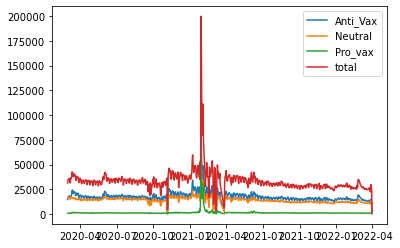

In [20]:
plt.plot(df['Date'], df['Anti_Vax'], label='Anti_Vax')
plt.plot(df['Date'], df['Neutral'], label='Neutral')
plt.plot(df['Date'], df['Pro_vax'], label='Pro_vax')
plt.plot(df['Date'], df['total'], label='total')
plt.legend()

In [124]:
df[df['total'] > 75000]

,Date,Anti_Vax,Neutral,Pro_vax,total
335,2021-01-28,81891.0,53463.0,64516.0,199870.0
336,2021-01-29,67179.0,45309.0,44743.0,157231.0
337,2021-01-30,40938.0,28896.0,21039.0,90873.0
338,2021-01-31,36758.0,27024.0,16036.0,79818.0
339,2021-02-01,47199.0,33056.0,31156.0,111411.0
340,2021-02-02,48676.0,33059.0,28498.0,110233.0
341,2021-02-03,36173.0,25808.0,13484.0,75465.0


In [24]:
wsb = pd.read_pickle('../../Files/Submissions/score/d_wallstreetbets.pickle')

In [27]:
from datetime import datetime
wsb['date'] = pd.to_datetime([datetime.fromtimestamp(f) for f in wsb['created_utc']]).date

In [99]:
agg = wsb.groupby(['date', 'pred_1'], as_index=False).num_comments.count()

In [100]:
agg = agg.pivot(index='date',columns='pred_1')

In [101]:
agg.columns = agg.columns.droplevel(0)

In [102]:
agg.columns = ['Anti_Vax', 'Neutral', 'Pro_vax']

In [103]:
agg['total'] = agg['Anti_Vax'] + agg['Neutral'] + agg['Pro_vax']

In [50]:
agg[agg['total'] == agg['total'].max() ]

,Anti_Vax,Neutral,Pro_vax,total
date,,,,
2021-01-28,59495,35510,63217,158222


In [ ]:
agg = agg.append({'date': datetime(2022, 3, 31).date(), 'Anti_Vax': 0, 'Neutral': 0, 'Pro_vax': 0, 'total': 0}, ignore_index=True)

In [107]:
agg.reset_index(inplace=True)

In [111]:
agg.tail()

,date,Anti_Vax,Neutral,Pro_vax,total
738,2022-03-27,210,57,68,335
739,2022-03-28,377,134,147,658
740,2022-03-29,484,166,196,846
741,2022-03-30,332,92,152,576
742,2022-03-31,0,0,0,0


In [139]:
df2 = df.copy()

In [150]:
agg[(agg['date']> datetime(2021,1,25 ).date()) & (agg['date']< datetime(2021,2,5 ).date())]

,date,Anti_Vax,Neutral,Pro_vax,total
331,2021-01-26,4406,2271,2408,9085
332,2021-01-27,15221,9269,16092,40582
333,2021-01-28,59495,35510,63217,158222
334,2021-01-29,46043,27872,43627,117542
335,2021-01-30,22963,13582,19997,56542
336,2021-01-31,19374,11656,15069,46099
337,2021-02-01,27795,16663,30123,74581
338,2021-02-02,28379,16766,27361,72506
339,2021-02-03,15681,9240,12342,37263
340,2021-02-04,13968,7527,7832,29327


In [148]:
df2[(df2['Date']> datetime(2021,1,25 )) & (df2['Date']< datetime(2021,2,3 ))]

,index,Date,Anti_Vax,Neutral,Pro_vax,total,min_anti
331,333,2021-01-26,18173.0,13258.0,3126.0,34557.0,4406
332,334,2021-01-27,23888.0,15840.0,16512.0,56240.0,15221
333,335,2021-01-28,81891.0,53463.0,64516.0,199870.0,59495
334,336,2021-01-29,67179.0,45309.0,44743.0,157231.0,46043
335,337,2021-01-30,40938.0,28896.0,21039.0,90873.0,22963
336,338,2021-01-31,36758.0,27024.0,16036.0,79818.0,19374
337,339,2021-02-01,47199.0,33056.0,31156.0,111411.0,27795
338,340,2021-02-02,48676.0,33059.0,28498.0,110233.0,28379


In [141]:
df2.reset_index(inplace=True)

In [144]:
df2.drop('index',axis=1)

,Date,Anti_Vax,Neutral,Pro_vax,total
0,2020-03-01,14715.0,15977.0,772.0,31464.0
1,2020-03-02,16899.0,17022.0,919.0,34840.0
2,2020-03-03,17629.0,16655.0,1016.0,35300.0
3,2020-03-04,18059.0,16432.0,1067.0,35558.0
4,2020-03-05,17683.0,16402.0,1024.0,35109.0
...,...,...,...,...,...
738,2022-03-27,11593.0,10169.0,682.0,22444.0
739,2022-03-28,14944.0,13798.0,1015.0,29757.0
740,2022-03-29,14200.0,11674.0,989.0,26863.0
741,2022-03-30,13286.0,10516.0,971.0,24773.0


In [138]:
agg.head(10)

,date,Anti_Vax,Neutral,Pro_vax,total
0,2020-03-01,421,104,185,710
1,2020-03-02,701,282,297,1280
2,2020-03-03,668,290,286,1244
3,2020-03-04,460,156,206,822
4,2020-03-05,507,164,232,903
5,2020-03-06,569,194,238,1001
6,2020-03-07,395,118,108,621
7,2020-03-08,304,74,119,497
8,2020-03-09,834,489,395,1718
9,2020-03-10,601,227,279,1107


In [145]:
df2['min_anti'] = agg['Anti_Vax']

In [146]:
df2.head()

,index,Date,Anti_Vax,Neutral,Pro_vax,total,min_anti
0,2,2020-03-01,14715.0,15977.0,772.0,31464.0,421
1,3,2020-03-02,16899.0,17022.0,919.0,34840.0,701
2,4,2020-03-03,17629.0,16655.0,1016.0,35300.0,668
3,5,2020-03-04,18059.0,16432.0,1067.0,35558.0,460
4,6,2020-03-05,17683.0,16402.0,1024.0,35109.0,507


In [151]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

In [155]:
df2['Pro_vax'] = df2['Pro_vax'] - agg['Pro_vax']

In [156]:
df2['total'] = df2['total'] - agg['total']

In [117]:
df2.head()

,Date,Anti_Vax,Neutral,Pro_vax,total
2,2020-03-01,14047.0,15977.0,772.0,31464.0
3,2020-03-02,16439.0,17022.0,919.0,34840.0
4,2020-03-03,17122.0,16655.0,1016.0,35300.0
5,2020-03-04,17490.0,16432.0,1067.0,35558.0
6,2020-03-05,17288.0,16402.0,1024.0,35109.0


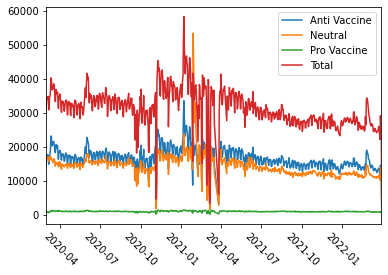

In [163]:
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti Vaccine')
plt.plot(df2['Date'], df2['Neutral'], label='Neutral')
plt.plot(df2['Date'], df2['Pro_vax'], label='Pro Vaccine')
plt.plot(df2['Date'], df2['total'], label='Total')
plt.ylim=(0,60000)
plt.xlim(datetime(2020, 3,1).date(),datetime(2022, 3,29).date())
plt.xticks(rotation=-45)
plt.legend()

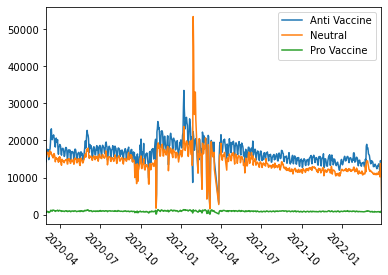

In [164]:
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti Vaccine')
plt.plot(df2['Date'], df2['Neutral'], label='Neutral')
plt.plot(df2['Date'], df2['Pro_vax'], label='Pro Vaccine')
# plt.plot(df2['Date'], df2['total'], label='Total')
plt.ylim=(0,60000)
plt.xlim(datetime(2020, 3,1).date(),datetime(2022, 3,29).date())
plt.xticks(rotation=-45)
plt.legend()

In [166]:
df2[df2['Neutral'] == df2['Neutral'].max()]

,index,Date,Anti_Vax,Neutral,Pro_vax,total,min_anti
333,335,2021-01-28,22396.0,53463.0,1299.0,41648.0,59495


In [154]:
df[df['Anti_Vax'] == df['Anti_Vax'].min()]

,Date,Anti_Vax,Neutral,Pro_vax,total
744,2022-03-31,1078.0,501.0,216.0,1795.0


(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.,
        19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

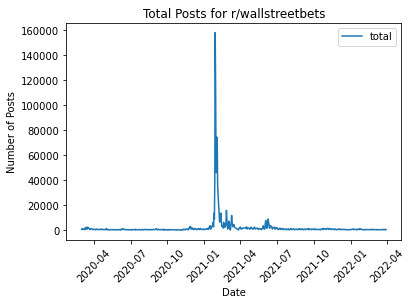

In [85]:

agg.plot('date', 'total')
plt.title("Total Posts for r/wallstreetbets")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)

In [72]:
agg[agg['date'] == datetime(2021,2,3 ).date()]

,date,Anti_Vax,Neutral,Pro_vax,total
339,2021-02-03,15681,9240,12342,37263


In [92]:
len(agg)

742

In [97]:
df2.tail()

,Date,Anti_Vax,Neutral,Pro_vax,total
740,2022-03-27,11109.0,10169.0,682.0,22444.0
741,2022-03-28,14612.0,13798.0,1015.0,29757.0
742,2022-03-29,NaN,11674.0,989.0,26863.0
743,2022-03-30,NaN,10516.0,971.0,24773.0
744,2022-03-31,NaN,501.0,216.0,1795.0


In [98]:
agg.tail()

,date,Anti_Vax,Neutral,Pro_vax,total
737,2022-03-26,277,81,124,482
738,2022-03-27,210,57,68,335
739,2022-03-28,377,134,147,658
740,2022-03-29,484,166,196,846
741,2022-03-30,332,92,152,576


In [93]:
len(df2)

743

In [86]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

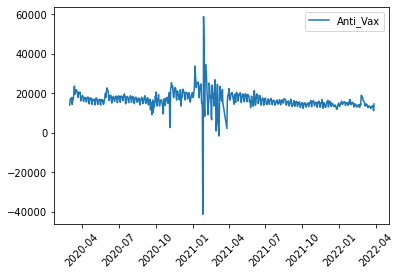

In [89]:
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti_Vax')
plt.xticks(rotation=45)
plt.legend()

In [91]:
df2[df2['Anti_Vax'] <0]

,Date,Anti_Vax,Neutral,Pro_vax,total
333,2021-01-26,-41322.0,13258.0,3126.0,34557.0
334,2021-01-27,-22155.0,15840.0,16512.0,56240.0
368,2021-03-07,-1652.0,1526.0,137.0,3542.0
